# KAATRU DATA SCIENTIST ASSESSMENT

### Importing Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
import sklearn.metrics  
import math
from prettytable import PrettyTable

import warnings
warnings.filterwarnings("ignore")

### Loading the dataset

In [2]:
df=pd.read_csv("day - day.csv")
df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,726,27-12-2019,1,1,12,0,5,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,1,1,12,0,6,0,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,1,1,12,0,0,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,1,1,12,0,1,1,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796


### EDA

In [3]:
df.shape

(730, 16)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [5]:
#Representing 'dteday' column as a day (1-31)
df['day'] = pd.DatetimeIndex(df['dteday']).day
df['day']

0       1
1       1
2       1
3       1
4       1
       ..
725    27
726    28
727    29
728    30
729    31
Name: day, Length: 730, dtype: int64

In [6]:
df.drop(['dteday'],axis=1,inplace=True)

In [7]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,day
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849,15.720548
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647,8.802278
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000,1.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000,8.000000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000,16.000000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000,23.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000,31.000000


In [8]:
# Checking For Missing Values (No Missing Values)
df.isnull().sum()

instant       0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
day           0
dtype: int64

### Outlier Analysis

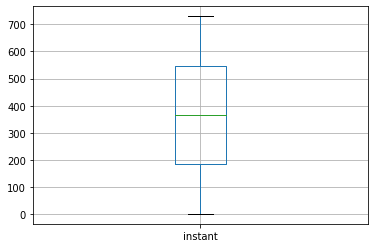

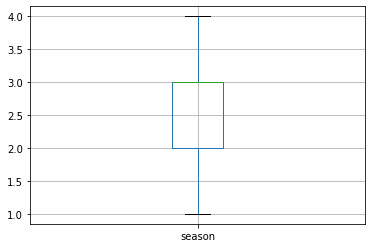

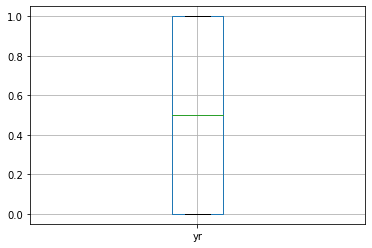

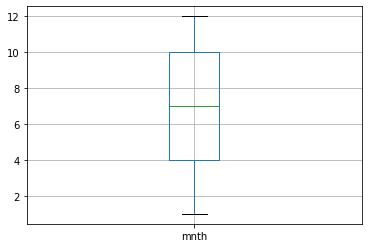

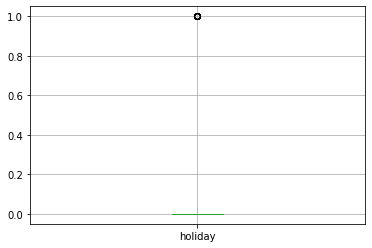

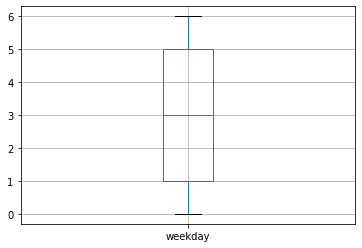

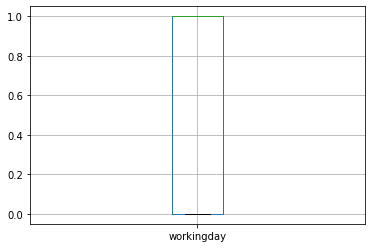

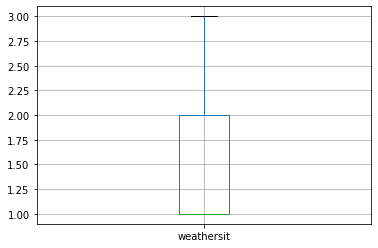

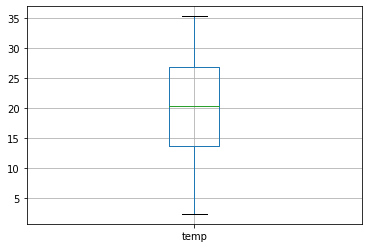

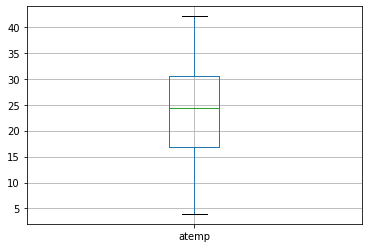

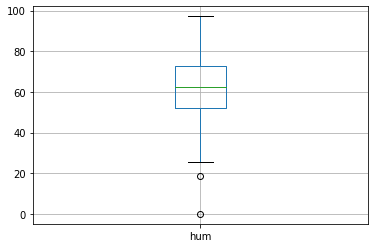

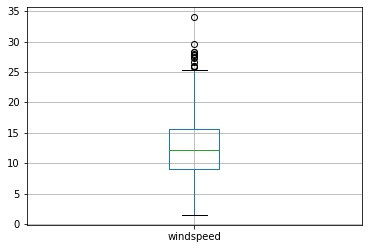

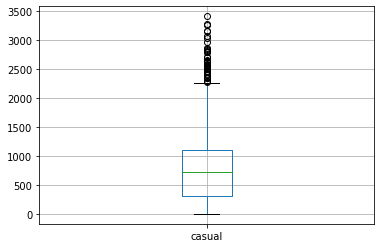

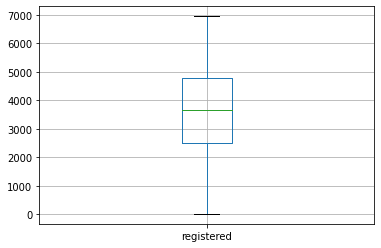

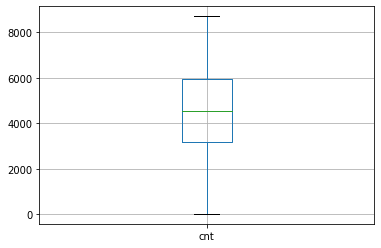

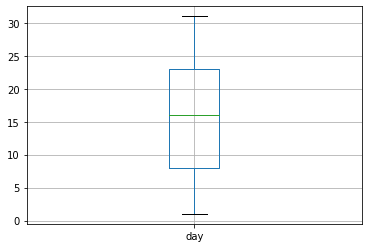

In [9]:
for column in df:
    plt.figure()
    df.boxplot([column])

In [10]:
# Outlier removal for 'casual' column
q1 = df.casual.quantile(0.25)
q3 = df.casual.quantile(0.75)
iqr = q3 - q1
lower_bound = q1 -(1.5 * iqr) 
upper_bound = q3 +(1.5 * iqr) 
df = df.loc[(df.casual >= lower_bound) & (df.casual <= upper_bound)]

In [11]:
# Outlier removal For 'windspeed' column
q1 = df.windspeed.quantile(0.25)
q3 = df.windspeed.quantile(0.75)
iqr = q3 - q1
lower_bound = q1 -(1.5 * iqr) 
upper_bound = q3 +(1.5 * iqr) 
df = df.loc[(df.windspeed >= lower_bound) & (df.windspeed <= upper_bound)]

### Feature Selection

<AxesSubplot:>

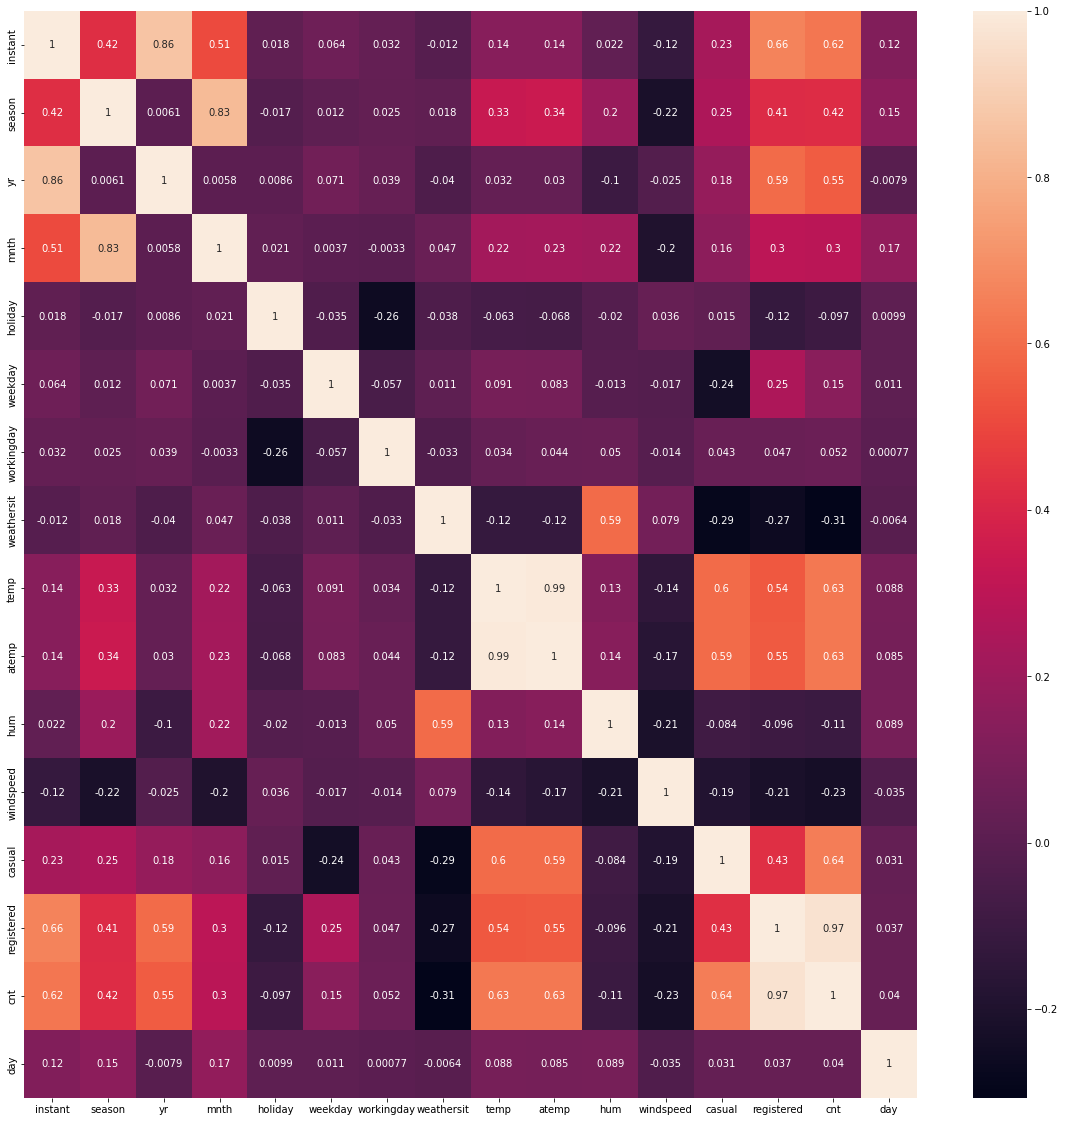

In [12]:
# Heatmap to visualize the correlation between the variables
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True)

### From the heatmap we can see that 'instant', 'yr', 'temp', 'atemp', 'casual', 'registered' are the most important features as they have a high correlation value.

In [13]:
# Seperating the dependant and independant variables
# The columns 'season', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'hum', 'windspeed', 'day' are dropped because they have low correlation
# The columns 'atemp', 'instant', 'yr' are dropped due to multicollinearity
X = df.drop(labels= ["season","mnth","holiday","weekday","workingday","weathersit","hum","windspeed","day","atemp","instant","yr","cnt"] , axis = 1)
Y = df["cnt"]

### Test Train Split

In [14]:
# 70% - Train, 30% - Test 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3)

In [15]:
X_train

,temp,casual,registered
278,20.260847,639,4126
589,29.554153,1207,5676
344,9.054153,377,2366
536,33.039153,778,5127
305,15.477500,370,3816
...,...,...,...
564,31.570000,888,5703
555,29.554153,954,5336
274,14.623347,616,2302
416,11.800866,163,3614


### Visualizations

<AxesSubplot:xlabel='temp', ylabel='cnt'>

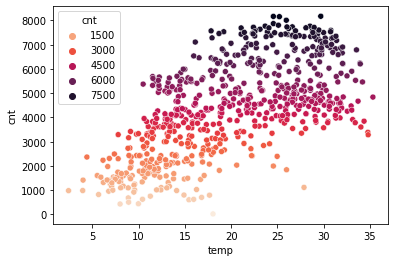

In [16]:
sns.scatterplot(data=df, x="temp", y="cnt",hue="cnt",palette='rocket_r')

<AxesSubplot:xlabel='casual', ylabel='cnt'>

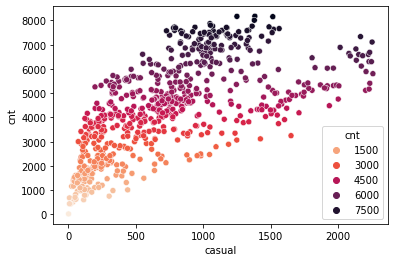

In [17]:
sns.scatterplot(data=df, x="casual", y="cnt",hue="cnt",palette='rocket_r')

<AxesSubplot:xlabel='registered', ylabel='cnt'>

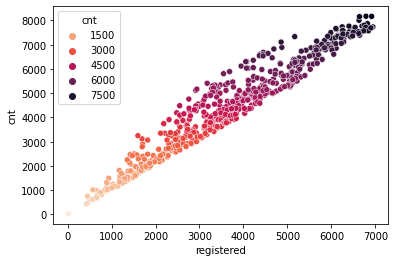

In [18]:
sns.scatterplot(data=df, x="registered", y="cnt",hue="cnt",palette='rocket_r')

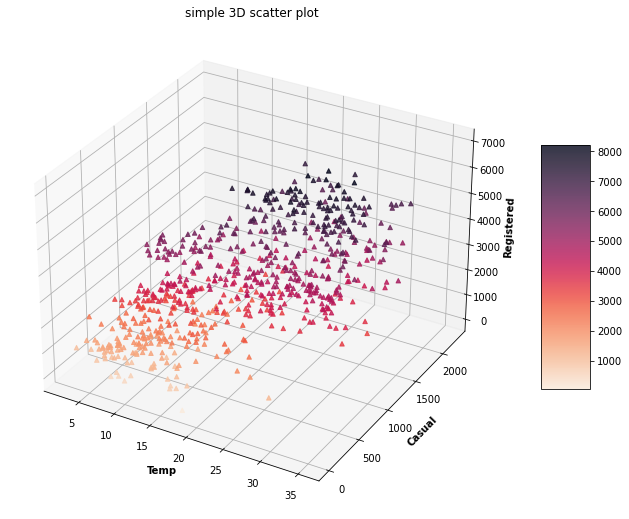

In [19]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt

x=df['temp']
y=df['casual']
z=df['registered']
 
# Creating figure
fig = plt.figure(figsize = (16, 9))
ax = plt.axes(projection ="3d")
   
# Add x, y gridlines
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.3,
        alpha = 0.2)
 
 
# Creating color map
my_cmap = plt.get_cmap('rocket_r')
 
# Creating plot
sctt = ax.scatter3D(x, y, z,
                    alpha = 0.8,
                    c = (x + y + z),
                    cmap = my_cmap,
                    marker ='^')
 
plt.title("simple 3D scatter plot")
ax.set_xlabel('Temp', fontweight ='bold')
ax.set_ylabel('Casual', fontweight ='bold')
ax.set_zlabel('Registered', fontweight ='bold')
fig.colorbar(sctt, ax = ax, shrink = 0.5, aspect = 5)
 

# show plot
plt.show()

## Model Building

### Linear Regression

In [20]:
lr=LinearRegression()

In [21]:
lr.fit(X_train,Y_train)

LinearRegression()

In [22]:
lr.score(X_train,Y_train)

1.0

In [23]:
lr.score(X_test,Y_test)

1.0

In [24]:
lr_pred=lr.predict(X_test)

In [25]:
#RMSE
lr_mse = sklearn.metrics.mean_squared_error(Y_test, lr_pred)  
lr_rmse = math.sqrt(lr_mse)  
print("{:.15f}".format(lr_rmse))

0.000000000000364


In [26]:
#MAE
lr_mae = sklearn.metrics.mean_absolute_error(Y_test, lr_pred)  
print("{:.15f}".format(lr_mae))

0.000000000000182


### Decision Tree

In [27]:
dTree= DecisionTreeRegressor(criterion='mse',max_depth=100)

In [28]:
dTree.fit(X_train,Y_train)

DecisionTreeRegressor(criterion='mse', max_depth=100)

In [29]:
dTree.score(X_train,Y_train)

1.0

In [30]:
dTree.score(X_test,Y_test)

0.9926932416735623

In [31]:
dTree_pred=dTree.predict(X_test)

In [32]:
dTree_mse = sklearn.metrics.mean_squared_error(Y_test, dTree_pred)  
dTree_rmse = math.sqrt(dTree_mse)  
print("{:.8f}".format(dTree_rmse))

162.17204530


In [33]:
dTree_mae = sklearn.metrics.mean_absolute_error(Y_test, dTree_pred)  
print("{:.8f}".format(dTree_mae))

112.77227723


### Random Forest

In [34]:
rfr = RandomForestRegressor(n_estimators=400, min_samples_split= 2, min_samples_leaf= 1, max_depth= 100, bootstrap= True)

In [35]:
rfr.fit(X_train, Y_train)

RandomForestRegressor(max_depth=100, n_estimators=400)

In [36]:
rfr.score(X_train,Y_train)

0.9996220131090235

In [37]:
rfr.score(X_test,Y_test)

0.9957280125889572

In [38]:
rfr_pred=rfr.predict(X_test)

In [39]:
rfr_mse = sklearn.metrics.mean_squared_error(Y_test, rfr_pred)  
rfr_rmse = math.sqrt(rfr_mse)  
print("{:.8f}".format(rfr_rmse))

124.00197565


In [40]:
rfr_mae = sklearn.metrics.mean_absolute_error(Y_test, rfr_pred)  
print("{:.8f}".format(rfr_mae))

76.53824257


### XG Boost

In [41]:
xgbr = xgb.XGBRegressor(max_depth=9,n_estimators=200)

In [42]:
xgbr.fit(X_train,Y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=9, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=200, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [43]:
xgbr.score(X_train,Y_train)

0.9999999999984415

In [44]:
xgbr.score(X_test,Y_test)

0.9954726977036665

In [45]:
xgbr_pred=xgbr.predict(X_test)

In [46]:
xgbr_mse = sklearn.metrics.mean_squared_error(Y_test, xgbr_pred)  
xgbr_rmse = math.sqrt(xgbr_mse)  
print("{:.8f}".format(xgbr_rmse))

127.65368892


In [47]:
xgbr_mae = sklearn.metrics.mean_absolute_error(Y_test, xgbr_pred)  
print("{:.8f}".format(xgbr_mae))

88.43309187


### KNN

In [48]:
knn = KNeighborsRegressor(n_neighbors=5)

In [49]:
knn.fit(X_train, Y_train)

KNeighborsRegressor()

In [50]:
knn.score(X_train, Y_train)

0.9988154486190325

In [51]:
knn.score(X_test, Y_test)

0.9972191582131835

In [52]:
knn_pred=knn.predict(X_test)

In [53]:
knn_mse = sklearn.metrics.mean_squared_error(Y_test, knn_pred)  
knn_rmse = math.sqrt(knn_mse)  
print("{:.8f}".format(knn_rmse))

100.04646841


In [54]:
knn_mae = sklearn.metrics.mean_absolute_error(Y_test, knn_pred)  
print("{:.8f}".format(knn_mae))

61.89900990


### Ridge Regression

In [55]:
rr = Ridge(alpha=1.0)

In [56]:
rr.fit(X_train,Y_train)

Ridge()

In [57]:
rr.score(X_train,Y_train)

1.0

In [58]:
rr.score(X_test,Y_test)

1.0

In [59]:
rr_pred=rr.predict(X_test)

In [60]:
rr_mse = sklearn.metrics.mean_squared_error(Y_test, rr_pred)   
rr_rmse = math.sqrt(rr_mse)  
print("{:.8f}".format(rr_rmse))

0.00000507


In [61]:
rr_mae = sklearn.metrics.mean_absolute_error(Y_test, rr_pred)  
print("{:.8f}".format(rr_mae))

0.00000380


### Lasso Regression

In [62]:
lassor = Lasso(alpha=1.0)

In [63]:
lassor.fit(X_train,Y_train)

Lasso()

In [64]:
lassor.score(X_train,Y_train)

0.999999999992566

In [65]:
lassor.score(X_test,Y_test)

0.9999999999932169

In [66]:
lassor_pred=lassor.predict(X_test)

In [67]:
lassor_mse = sklearn.metrics.mean_squared_error(Y_test, lassor_pred)  
lassor_rmse = math.sqrt(lassor_mse)  
print("{:.8f}".format(lassor_rmse))

0.00494115


In [68]:
lassor_mae = sklearn.metrics.mean_absolute_error(Y_test, lassor_pred)  
print("{:.8f}".format(lassor_mae))

0.00370879


### Final Result

In [69]:
x = PrettyTable()

column_names = ["Algorithm(without both)", "R^2(Train)","R^2(Test)", "RMSE", "MAE"]
x.add_column(column_names[0], ["Linear Regression", "Decision Tree", "Random Forest", 
    "XG Boost", "KNN", "Ridge Regression", "Lasso Regression"])
x.add_column(column_names[1], [lr.score(X_train,Y_train), dTree.score(X_train,Y_train), rfr.score(X_train,Y_train), xgbr.score(X_train,Y_train), knn.score(X_train, Y_train), rr.score(X_train,Y_train), lassor.score(X_train,Y_train) ]) 
x.add_column(column_names[2], [lr.score(X_test,Y_test), dTree.score(X_test,Y_test), rfr.score(X_test,Y_test), xgbr.score(X_test,Y_test), knn.score(X_test, Y_test), rr.score(X_test,Y_test), lassor.score(X_test,Y_test) ]) 
x.add_column(column_names[3], ["{:.15f}".format(lr_rmse), "{:.8f}".format(dTree_rmse), "{:.8f}".format(rfr_rmse), "{:.8f}".format(xgbr_rmse), "{:.8f}".format(knn_rmse), 
    "{:.8f}".format(rr_rmse), "{:.8f}".format(lassor_rmse)])  
x.add_column(column_names[4], ["{:.15f}".format(lr_mae), "{:.8f}".format(dTree_mae), "{:.8f}".format(rfr_mae), "{:.8f}".format(xgbr_mae), "{:.8f}".format(knn_mae), 
    "{:.8f}".format(rr_mae), "{:.8f}".format(lassor_mae)])

print(x)

+-------------------------+--------------------+--------------------+-------------------+-------------------+
| Algorithm(without both) |     R^2(Train)     |     R^2(Test)      |        RMSE       |        MAE        |
+-------------------------+--------------------+--------------------+-------------------+-------------------+
|    Linear Regression    |        1.0         |        1.0         | 0.000000000000364 | 0.000000000000182 |
|      Decision Tree      |        1.0         | 0.9926932416735623 |    162.17204530   |    112.77227723   |
|      Random Forest      | 0.9996220131090235 | 0.9957280125889572 |    124.00197565   |    76.53824257    |
|         XG Boost        | 0.9999999999984415 | 0.9954726977036665 |    127.65368892   |    88.43309187    |
|           KNN           | 0.9988154486190325 | 0.9972191582131835 |    100.04646841   |    61.89900990    |
|     Ridge Regression    |        1.0         |        1.0         |     0.00000507    |     0.00000380    |
|     Lass

## Therefore we can conclude that the best model for this dataset is Linear Regression.

 ## The most significant features are 'temp', 'casual', registered'.